In [350]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [351]:
# Import the log file
df = pd.read_csv("log.csv")
# LabelEncoder for the diffMethod
enc = LabelEncoder()
enc.fit(df["diffMethod"])
df["diffMethod"] = enc.transform(df["diffMethod"])
# Add the f1_score
df["f1_score"] = 1/(1/df["percentHeliTotalFiltered"]+1/df["percentFrameWithHeli"])

# Display
df.tail()

,gaussWindow,mgp,minArea,diffMethod,winSize,maxLevel,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
1345,11,150,25,0,21,4,97.036955,2.094821,0.072210,0.057622,0.797980,0.056769,0.052998
1346,11,150,25,0,21,7,95.160994,2.087527,0.072210,0.058352,0.808081,0.057496,0.053677
1347,11,150,25,0,29,1,99.465694,1.800146,0.073669,0.058352,0.792079,0.057496,0.053605
1348,11,150,25,0,29,4,90.383653,1.752006,0.076586,0.056163,0.733333,0.055313,0.051433
1349,11,150,25,0,29,7,90.227774,1.752006,0.076586,0.056163,0.733333,0.055313,0.051433


[0, 1, 0, 1]

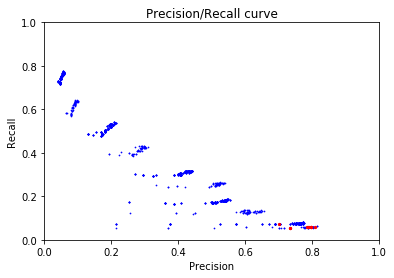

In [352]:
nSim = len(df)-10 # Show where the last 10 values have been found
plt.figure()
plt.scatter(df["percentHeliTotalFiltered"][:nSim], df["percentFrameWithHeli"][:nSim], s=0.5, c='blue')
plt.scatter(df["percentHeliTotalFiltered"][nSim:], df["percentFrameWithHeli"][nSim:], s=5, c='red')
plt.title("Precision/Recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.axis([0, 1, 0, 1])

In [353]:
def plotParam(param, paramRange):
    plt.figure(figsize=(25, 15))
    colors = ['blue', 'purple', 'yellow', 'orange', 'red']
    cmap = matplotlib.cm.get_cmap("jet")
    for index, value in enumerate(paramRange):
        indexes = (df[param] == value)
        prec = df["percentHeliTotalFiltered"][indexes]
        recall = df["percentFrameWithHeli"][indexes]
        plt.scatter(prec, recall, c=cmap(value/max(paramRange)))
        i = np.random.randint(len(prec))
        plt.text(prec.iloc[i], recall.iloc[i], str(value), color=cmap(value/max(paramRange)), fontdict={"weight": "bold", "size": 30})
        plt.title(param+" impact", fontdict={"weight": "bold", "size": 30})
    plt.xlabel("Precision", fontdict={"weight": "bold", "size": 20})
    plt.ylabel("Recall", fontdict={"weight": "bold", "size": 20})
    plt.axis([0, 1, 0, 1])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

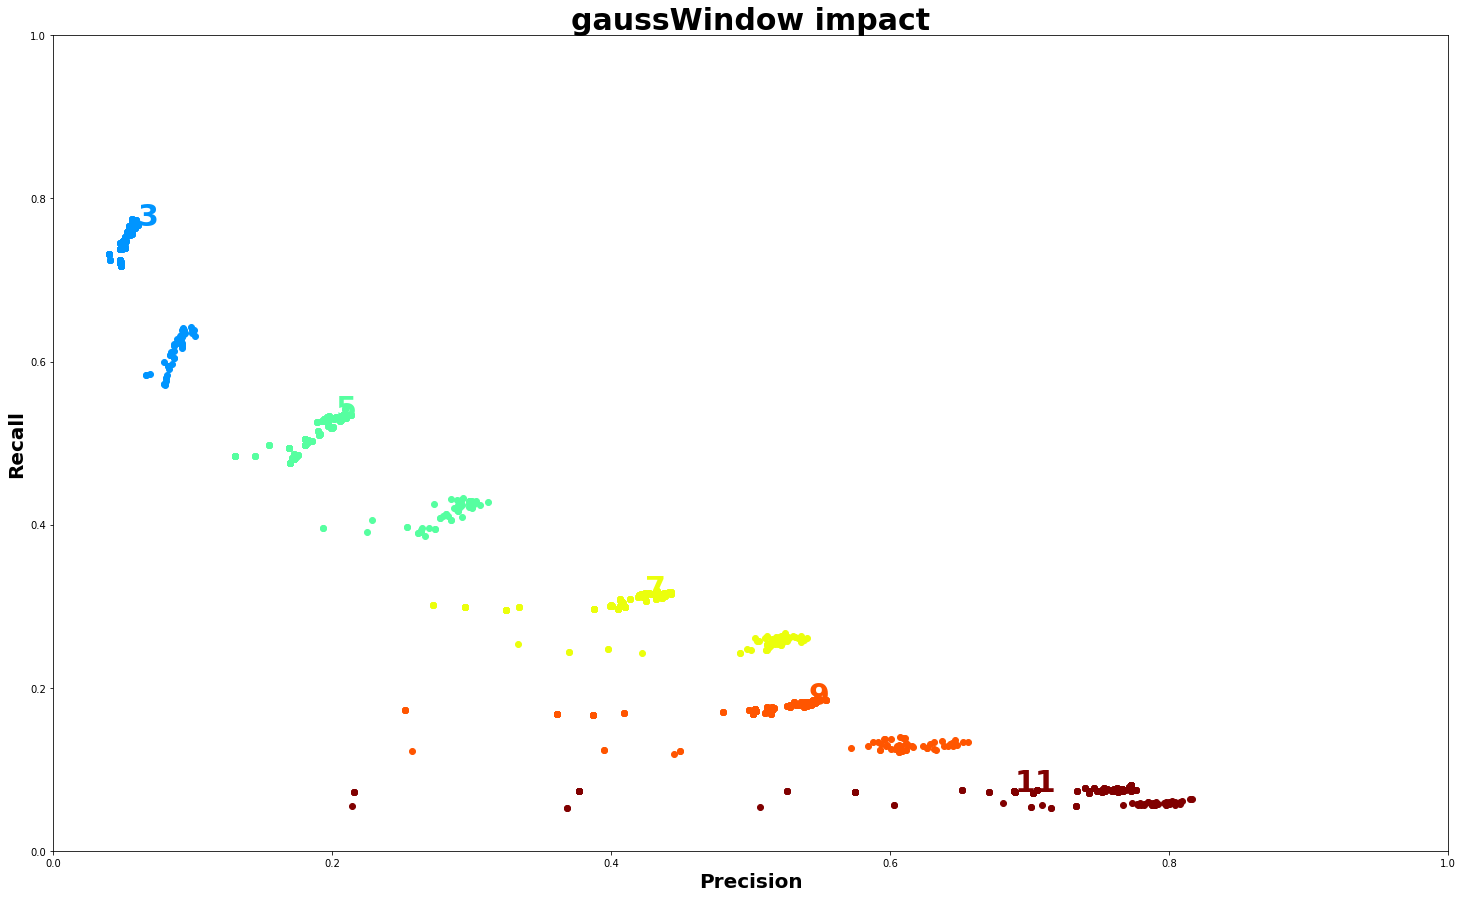

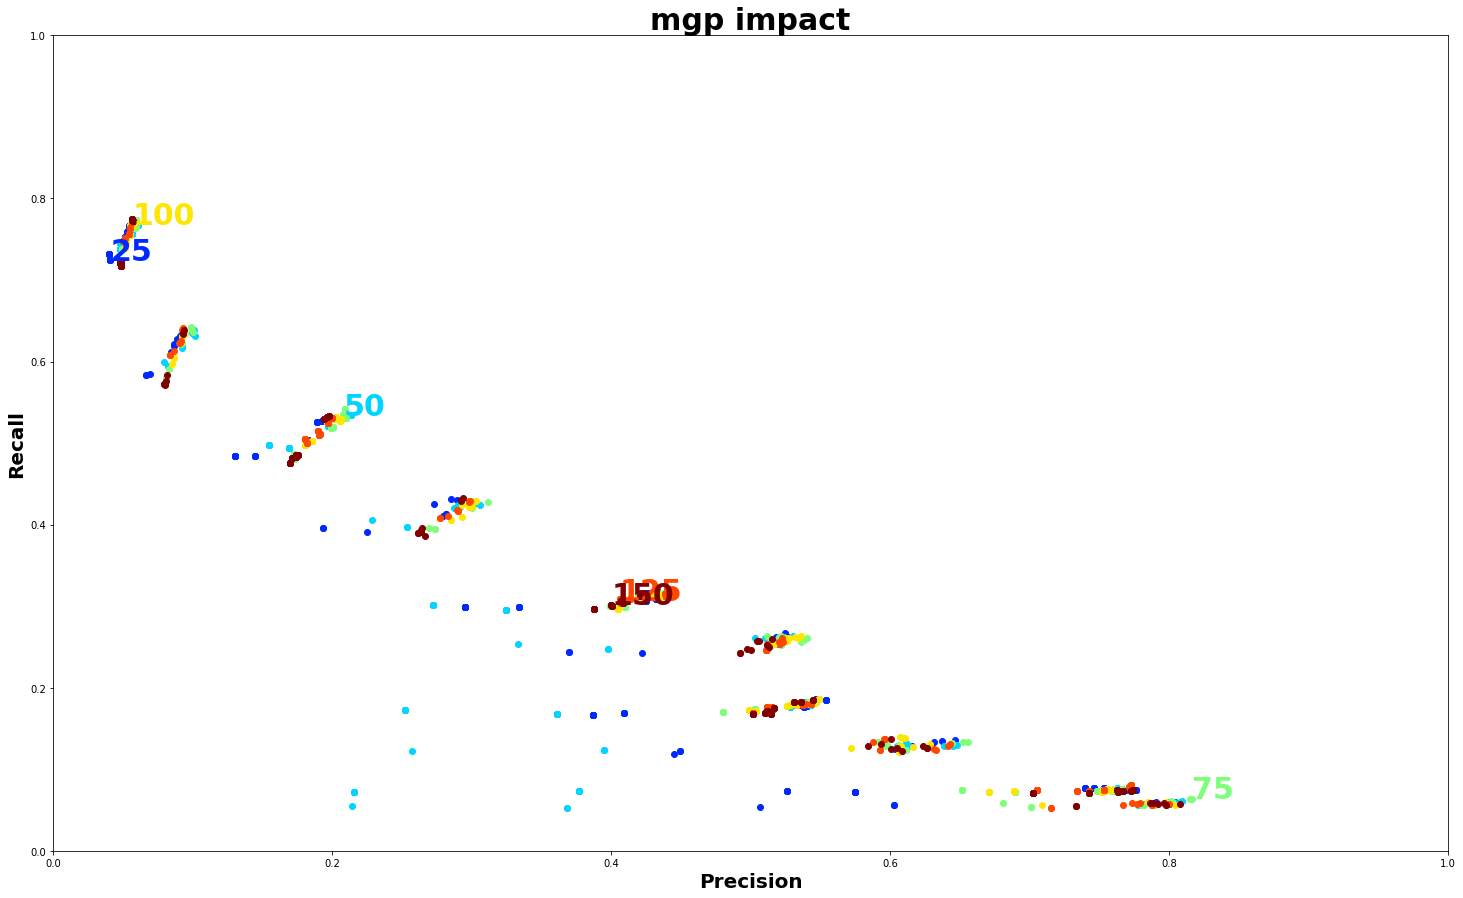

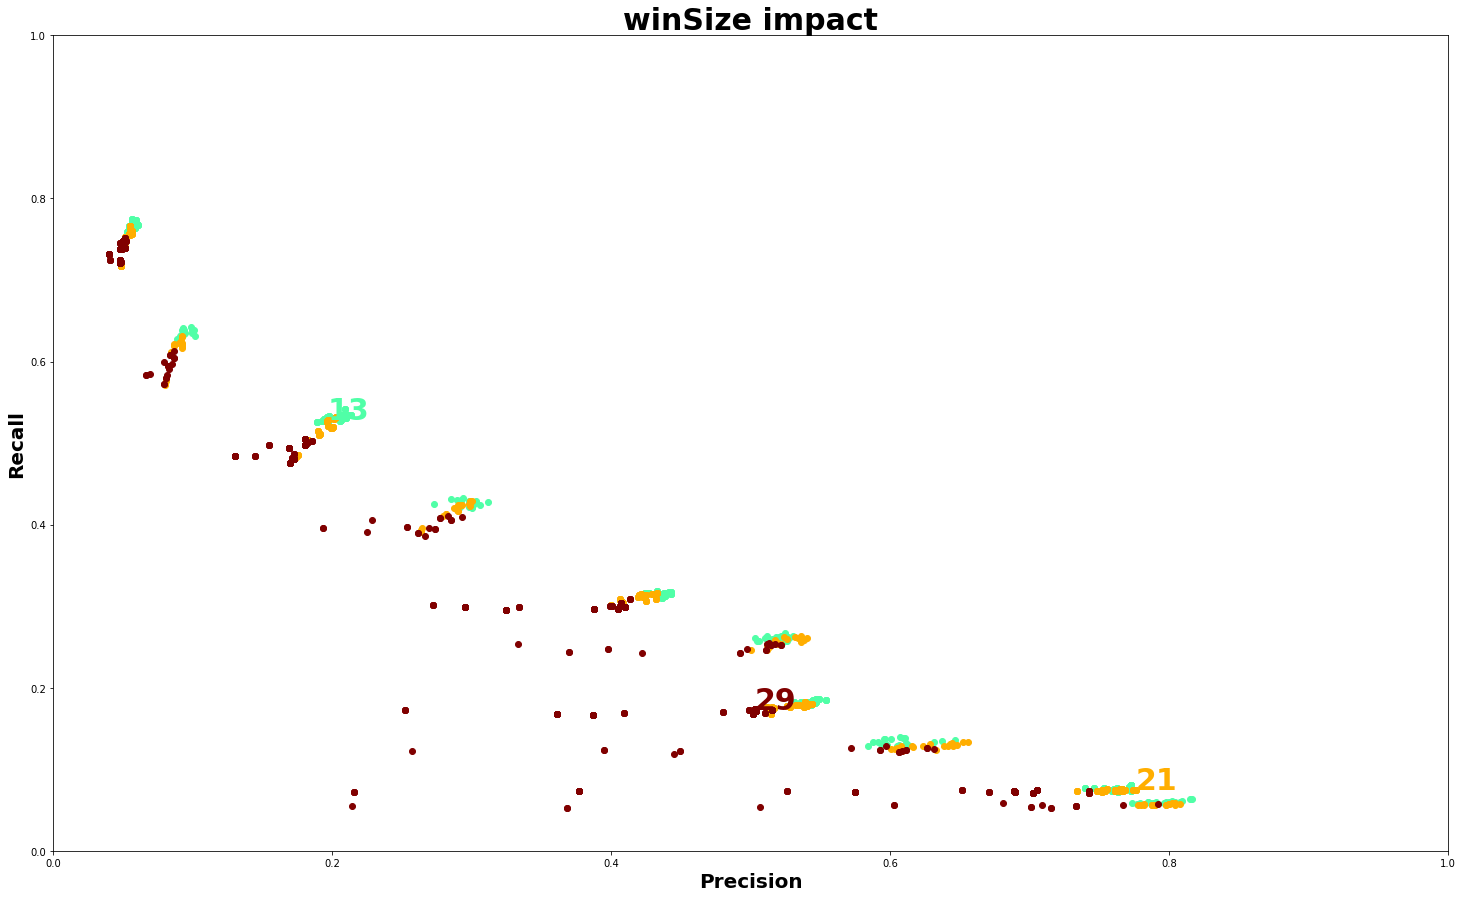

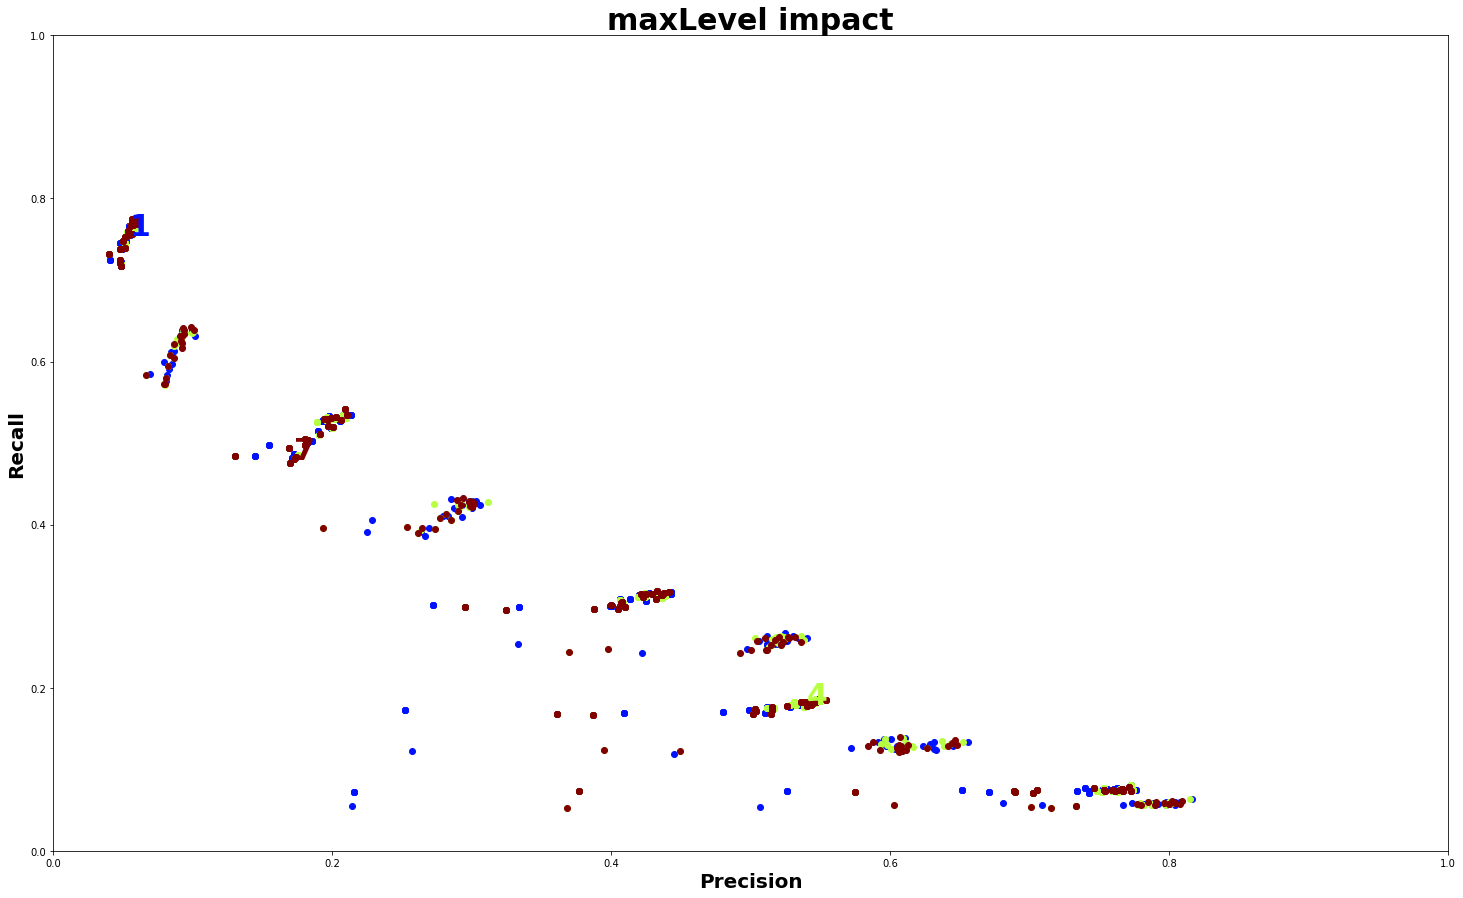

In [354]:
param = ["gaussWindow", "mgp", "winSize", "maxLevel"]
paramRange = [range(3, 12, 2), range (25, 151, 25), range(13, 30, 8), range(1, 8, 3)]
for i in range(len(param)):
    plotParam(param[i], paramRange[i])

In [355]:
# Max f1_score
df[df["f1_score"] == max(df["f1_score"])]

,gaussWindow,mgp,minArea,diffMethod,winSize,maxLevel,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
720,7,125,1,0,13,1,91.579920,4.59081,0.911743,0.404085,0.4432,0.317322,0.184922
729,7,125,4,0,13,1,112.525966,4.59081,0.911743,0.404085,0.4432,0.317322,0.184922
738,7,125,9,0,13,1,109.871832,4.59081,0.911743,0.404085,0.4432,0.317322,0.184922
747,7,125,16,0,13,1,110.987827,4.59081,0.911743,0.404085,0.4432,0.317322,0.184922


In [356]:
# Max precision
df[df["percentHeliTotalFiltered"] == max(df["percentHeliTotalFiltered"])]

,gaussWindow,mgp,minArea,diffMethod,winSize,maxLevel,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
1206,11,75,25,0,13,1,104.087463,1.83078,0.079504,0.064916,0.816514,0.064047,0.059388


In [357]:
# Max recall
df[df["percentFrameWithHeli"] == max(df["percentFrameWithHeli"])]

,gaussWindow,mgp,minArea,diffMethod,winSize,maxLevel,realFps,avNbBoxes,avNbFilteredBoxes,avNbHeliBox,percentHeliTotalFiltered,percentFrameWithHeli,f1_score
227,3,150,1,0,13,7,105.941180,25.140044,16.748359,0.95186,0.056833,0.774381,0.052947
236,3,150,4,0,13,7,108.336886,25.140044,16.748359,0.95186,0.056833,0.774381,0.052947
245,3,150,9,0,13,7,108.831425,25.140044,16.748359,0.95186,0.056833,0.774381,0.052947
254,3,150,16,0,13,7,107.618741,25.140044,16.748359,0.95186,0.056833,0.774381,0.052947


Text(0, 0.5, 'F1 - score')

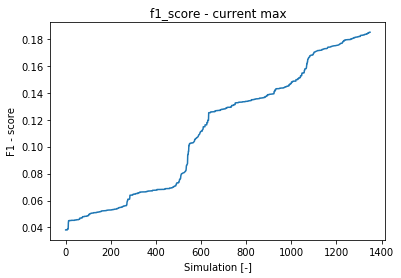

In [358]:
plt.figure()
plt.plot(sorted(df["f1_score"]))
plt.title("f1_score - current max")
plt.xlabel("Simulation [-]")
plt.ylabel("F1 - score")

In [359]:
pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(df)

In [360]:
df_reduced.shape

(1350, 4)